In [1]:
import numpy as np
import matplotlib.pyplot as plt

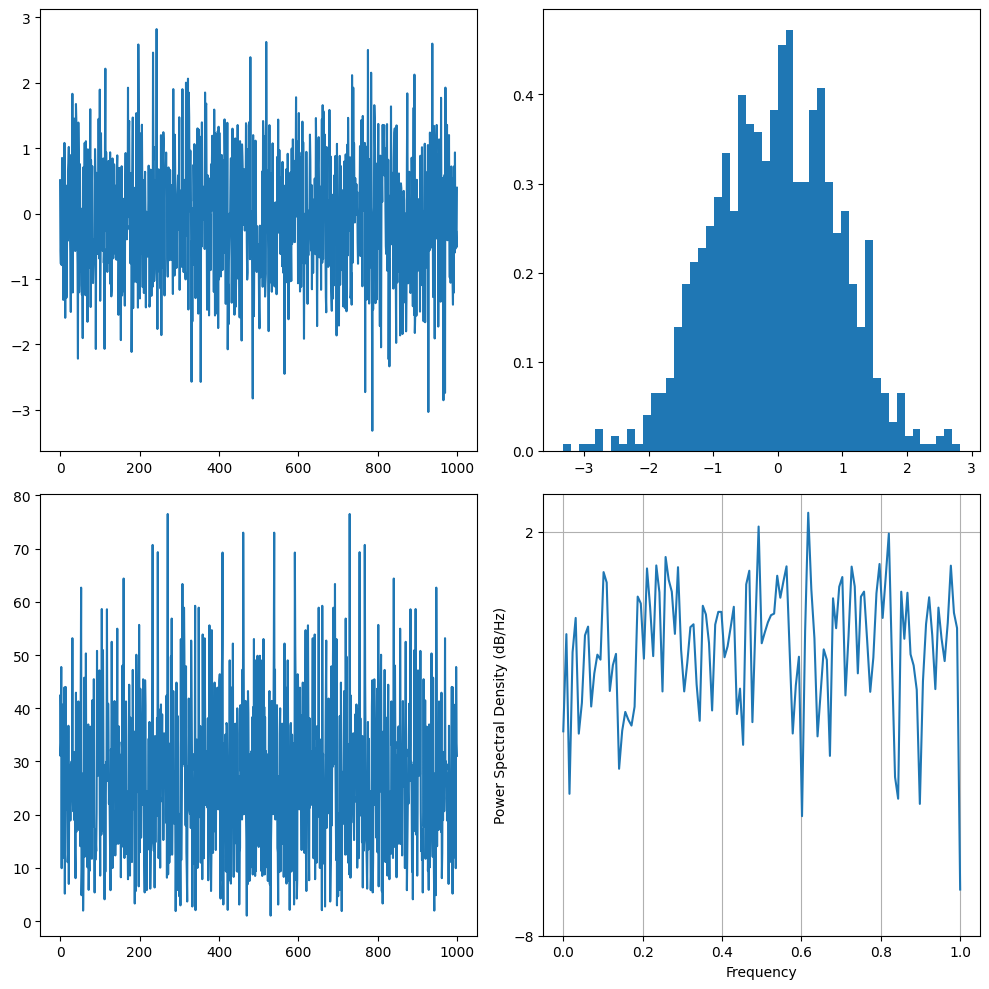

In [19]:
random_signal = np.random.randn(1000)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(random_signal)

plt.subplot(222)
plt.hist(random_signal, bins=50, density=True)

plt.subplot(223)
plt.plot(np.abs(np.fft.fft(random_signal)))

plt.subplot(224)
frequencies, psd = plt.psd(random_signal, NFFT=256, Fs=2, noverlap=128, window=np.hamming(256))

plt.tight_layout()
plt.show()



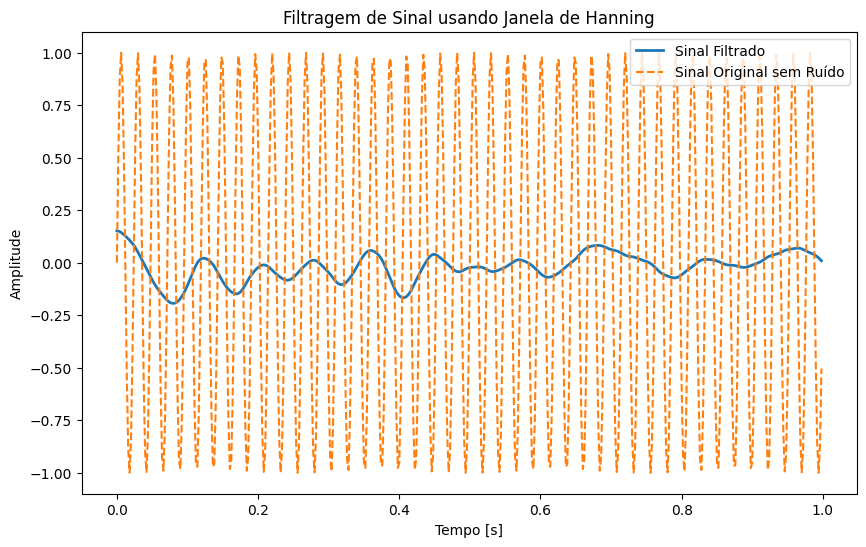

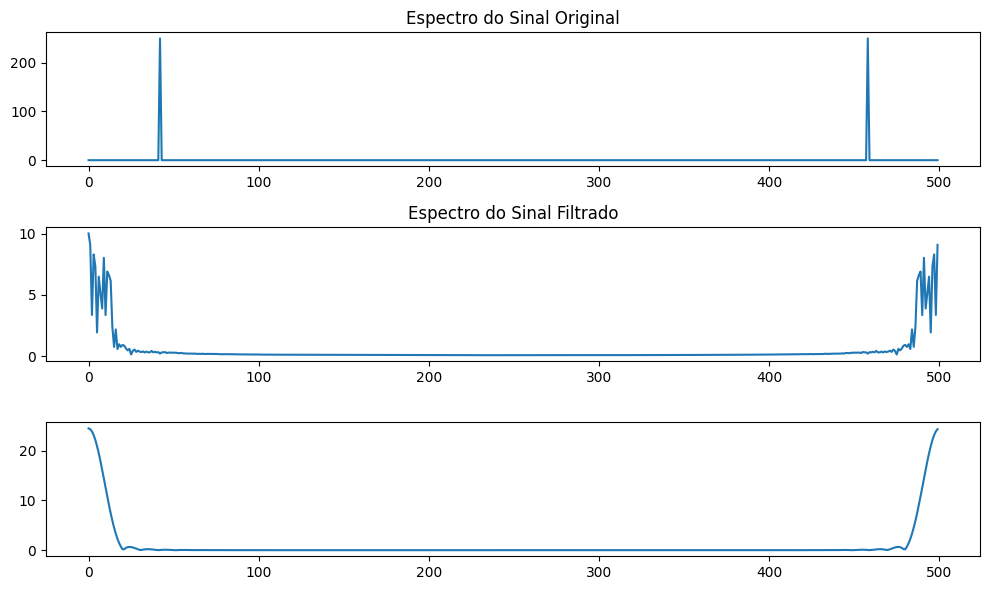

In [ ]:
# Criar um sinal de exemplo
t = np.linspace(0, 1, 500, endpoint=False)
sinal_limpo = np.sin(2 * np.pi * 42 * t)
sinal = sinal_limpo + np.random.randn(500) * 0.5

# Criar uma janela de Hanning
janela = np.hanning(50)

# Filtrar o sinal usando a janela de Hanning
sinal_filtrado = np.convolve(sinal, janela, mode='same') / sum(janela)

# Plotar o sinal original e o sinal filtrado
plt.figure(figsize=(10, 6))
# plt.plot(t, sinal, label='Sinal Original')
plt.plot(t, sinal_filtrado, label='Sinal Filtrado', linewidth=2)
plt.plot(t, sinal_limpo, label='Sinal Original sem Ruído', linestyle='--')
plt.legend()
plt.title('Filtragem de Sinal usando Janela de Hanning')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(np.abs(np.fft.fft(sinal_limpo)))
plt.title('Espectro do Sinal Original')

plt.subplot(312)
plt.plot(np.abs(np.fft.fft(sinal_filtrado)))
plt.title('Espectro do Sinal Filtrado')

plt.subplot(313)
plt.plot(np.abs(np.fft.fft(janela, 500)))

plt.tight_layout()
plt.show()

In [37]:
from scipy.signal import firwin

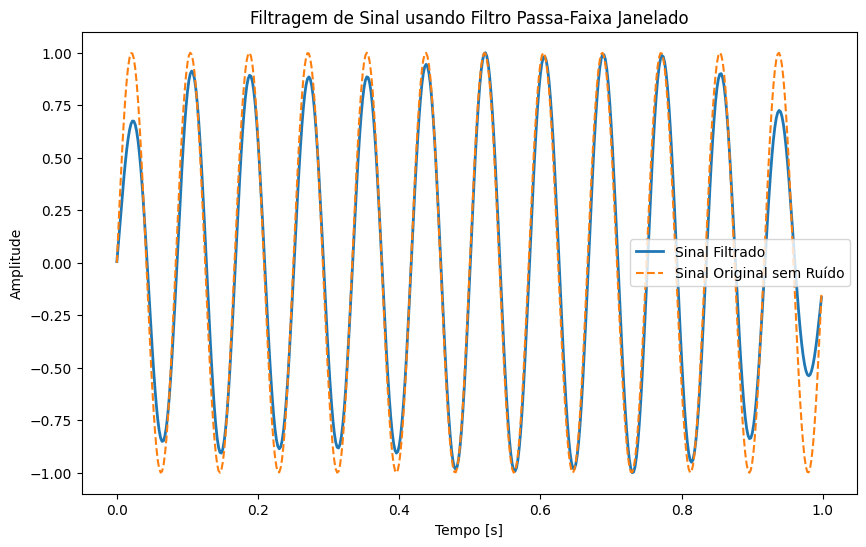

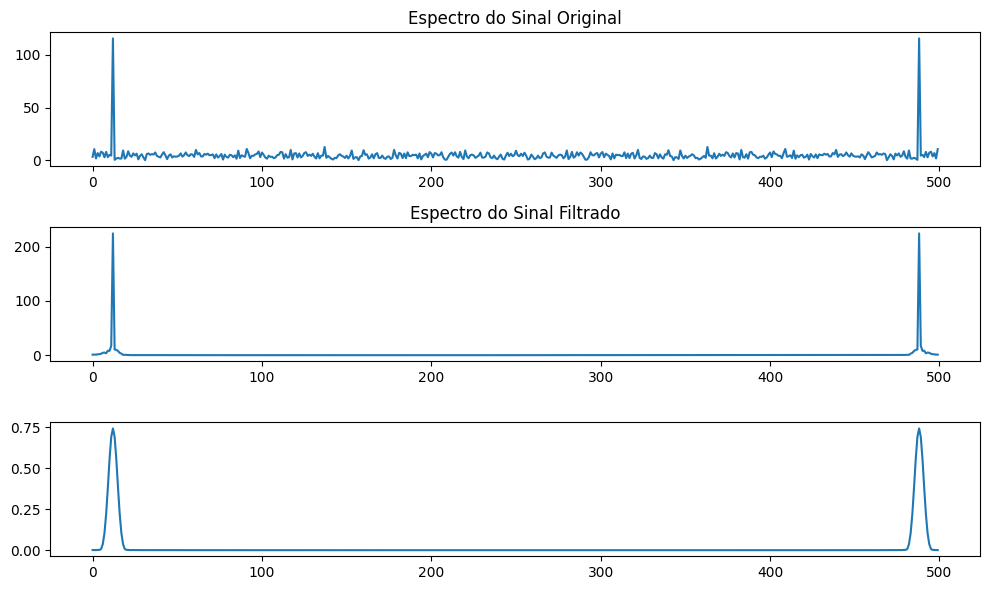

In [ ]:
sinal_limpo = np.sin(2 * np.pi * 12 * t)
sinal = sinal_limpo + np.random.randn(500) * 0.5
# Definir os limites da faixa de passagem
frequencia_de_corte_baixa = 11.5  # Hz
frequencia_de_corte_alta = 12.5  # Hz
frequencia_de_amostragem = 500  # Hz

# Criar a janela de Hamming
N = 200  # Número de coeficientes do filtro
janela = np.hamming(N)

# Criar o filtro passa-faixa usando firwin
filtro_passa_faixa = firwin(N, [frequencia_de_corte_baixa, frequencia_de_corte_alta], pass_zero=False, fs=frequencia_de_amostragem)

# Multiplicar o filtro pela janela
filtro_janelado = filtro_passa_faixa * janela

# Filtrar o sinal usando o filtro janelado
sinal_filtrado = np.convolve(sinal, filtro_janelado, mode='same')

sinal = sinal/np.max(sinal)
sinal_filtrado = sinal_filtrado/np.max(sinal_filtrado)

# Plotar o sinal original e o sinal filtrado
plt.figure(figsize=(10, 6))
plt.plot(t, sinal_filtrado, label='Sinal Filtrado', linewidth=2)
plt.plot(t, sinal_limpo, label='Sinal Original sem Ruído', linestyle='--')
plt.legend()
plt.title('Filtragem de Sinal usando Filtro Passa-Faixa Janelado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(np.abs(np.fft.fft(sinal)))
plt.title('Espectro do Sinal Original')

plt.subplot(312)
plt.plot(np.abs(np.fft.fft(sinal_filtrado)))
plt.title('Espectro do Sinal Filtrado')

plt.subplot(313)
plt.plot(np.abs(np.fft.fft(filtro_janelado, 500)))

plt.tight_layout()
plt.show()